<p style="text-align:center; font-size:32px;">Expecation Maximization (EM) Algorithm</p> 

- EM is an iterative algorithm that is used to find the maximum likelihood estimate of the parameters of a statistical model. 
- It is used when the likelihood function is intractable. 
- EM is a general method for finding maximum likelihood estimates when the model depends on unobserved latent variables.



In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Mixture of Gussians 

In [8]:
class Guassian:
    # A gusssian distribution class for calculating and visualizing a Gaussian distribution.
    def __init__(self, mu=0, sigma=1):
        # Initialize the gaussian distribution
        self.mean = mu
        self.stdev = sigma
        self.data = []
        
    def calculate_mean(self):
        # Calculate the mean of the data set.
        avg = 1.0 * sum(self.data) / len(self.data)
        self.mean = avg
        return self.mean
    
    def calculate_stdev(self, sample=True):
        # Calculate the standard deviation of the data set.
        if sample:
            n = len(self.data) - 1
        else:
            n = len(self.data)
        mean = self.mean
        sigma = 0
        for d in self.data:
            sigma += (d - mean) ** 2
        sigma = np.sqrt(sigma / n)
        self.stdev = sigma
        return self.stdev
    
    def sample(self, n=1):
        # Generate a list of n samples from the gaussian distribution.
        return np.random.normal(self.mean, self.stdev, n)
        
    def pdf(self, x):
        # Calculate the probability density function of the gaussian distribution.
        return (1.0 / (self.stdev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - self.mean) / self.stdev) ** 2)
    
    def plot_histogram(self):
        # Plot a histogram of the data set.
        plt.hist(self.data)
        plt.title('Histogram of Data')
        plt.xlabel('data')
        plt.ylabel('count')
    
    def plot_histogram_pdf(self, axes=None, n_spaces=50):
        # Plot the normalized histogram of the data set and plot the PDF along side.
        mu = self.mean
        sigma = self.stdev
        min_range = self.mean - 4 * self.stdev
        max_range = self.mean + 4 * self.stdev
        # Calculate the interval between x values
        interval = 1.0 * (max_range - min_range) / n_spaces
        x = []
        y = []
        # Calculate the x values to visualize
        for i in range(n_spaces):
            tmp = min_range + interval * i
            x.append(tmp)
            y.append(self.pdf(tmp))
        # Make the plots
        if axes is None:
            fig, axes = plt.subplots(1, sharex=True)
        axes.plot(x, y)
        axes.set_label(f"N({mu}, {sigma})")
        axes.set_ylabel('Density')
        return x, y

    def cdf(self, x):
        # Calculate the value of the CDF for a given x value.
        return (1 + np.erf((x - self.mean) / (self.stdev * np.sqrt(2)))) / 2
    
    

In [33]:
class MixtureGuassian:
    # mixture of K guassian distributions class, with methods for calculating pdf, cdf, and the log likelihood from data
    def __init__(self, K=2, mu=None, sigma=None, pi=None):
        # Initialize the mixture of guassian distribution
        self.K = K
        self.gaussians = []
        if mu is None:
            self.mu = np.random.rand(K)
        else:
            self.mu = mu
        if sigma is None:
            self.sigma = np.random.rand(K)
        else:
            self.sigma = sigma
        if pi is None:
            self.pi = np.random.rand(K)
        else:
            self.pi = pi
        for i in range(K):
            self.gaussians.append(Guassian(self.mu[i], self.sigma[i]))
    
    def pdf(self, x):
        # Calculate the probability density function of the mixture of k guassian distributions
        return sum([self.pi[k] * self.gaussians[k].pdf(x) for k in range(self.K)])
    
    def cdf(self, x):
        # Calculate the value of the CDF for a given x value.
        return sum([self.pi[k] * self.gaussians[k].cdf(x) for k in range(self.K)])
    
    def log_likelihood(self, X):
        # Calculate the log likelihood of the data set
        return sum([np.log(self.pdf(x)) for x in X])
    
    def sample(self, n=1, p=None):
        # Generate a list of n samples from the mixture of guassian distribution. 
        # return the list of samples and their corresponding labels
        samples = []
        labels = []
        if p is None:
            p = self.pi
        for i in range(n):
            k = np.random.choice(self.K, p=p)
            samples.append(self.gaussians[k].sample())
            labels.append(k)
        return samples, labels
    
    def plot_histogram(self):
        # Plot a histogram of the data set.
        for k in range(self.K):
            self.gaussians[k].plot_histogram()
    
    def plot_histogram_pdf(self, n_spaces=50):
        # Plot the normalized histogram of the data set and plot the PDF along side.
        fig, axes = plt.subplots(1, sharex=True, figsize=(9, 6))

        # Plot the normalized histogram of the data set and plot the PDF along side.
        min_range = np.min(self.mu) - 4 * np.max(self.sigma)
        max_range = np.max(self.mu) + 4 * np.max(self.sigma)
        # Calculate the interval between x values
        interval = 1.0 * (max_range - min_range) / n_spaces
        x = []
        y = []
        # Calculate the x values to visualize
        for i in range(n_spaces):
            tmp = min_range + interval * i
            x.append(tmp)
            y.append(self.pdf(tmp))
        # Make the plots
        axes.plot(x, y)
        axes.set_label(f"Mixture Model)")
        axes.set_ylabel('Density')
        return x, y
    

<p style="text-align:left; font-size:32px;">Assume we have a model that is a mimxture of K=2 Guassian distributions:</p>
 
$$
\theta = (\pi, \theta_1, \theta_2); \theta_i = (\mu_i, \sigma_i) \\
$$

<p style="text-align:left; font-size:32px;">The density function of this model can be written and calculated as :</p>

$
\mathcal{f}(x, \theta)  = \sum_{k=1}^K \pi_k \mathcal{N}(x; \mu_k, \sigma_k) \\ % log likelihood of a single data point
$

    def pdf(self, x):
        # Calculate the probability density function of the mixture of k guassian distributions
        return sum([self.pi[k] * self.gaussians[k].pdf(x) for k in range(self.K)])


<p style="text-align:left; font-size:32px;">And the log likelihood can be written and calculated as :</p>

$
\mathcal{L}(\theta ) = \sum_{i=1}^n \log \mathcal{f}(x_i, \theta)  \\ % log likelihood 
$

    def log_likelihood(self, X):
        # Calculate the log likelihood of the data set
        return sum([np.log(self.pdf(x)) for x in X])


<p style="text-align:left; font-size:32px;"> Expectation Step <p>

$$ \gamma_{ik} = \frac{\pi_kf(x, \theta)}{\sum_{i}\gamma_{i,k}}\sum_{i}\gamma_{i,k}x_i,$$


    def expectation(self, X):
        # Calculate the expectation of the log likelihood
        N = len(X)
        gamma = np.zeros((N, self.K))
        for n in range(N):
            for k in range(self.K):
                gamma[n, k] = self.mix_gauss.pi[k] * self.mix_gauss.gaussians[k].pdf(X[n])
            gamma[n, :] /= sum(gamma[n, :])
        return gamma
    

<p style="text-align:left; font-size:32px;"> Maximization Step <p>

$$\pi_{k} = \frac{1}{n}\sum_{i=1}^n\gamma_{i,k},\quad k=1,\dots,K$$
$$ \mu_{k} = \frac{1}{\sum_{i}\gamma_{i,k}}\sum_{i}\gamma_{i,k}x_i,$$

$$  \sigma_{k}=\sqrt{\frac{1}{\sum_{i}\gamma_{i,k}}\sum_{i}\gamma_{i,k}(X_j-\mu_{k})^2}$$

    def maximization(self, X, gamma):
        # Calculate the maximization of the log likelihood
        N = len(X)
        for k in range(self.K):
            Nk = sum(gamma[:, k])
            self.mix_gauss.pi[k] = Nk / N
            self.mix_gauss.gaussians[k].mean = sum([gamma[n, k] * X[n] for n in range(N)]) / Nk
            self.mix_gauss.gaussians[k].stdev = np.sqrt(sum([gamma[n, k] * (X[n] - self.mix_gauss.gaussians[k].mean) ** 2 for n in range(N)]) / Nk)
    

In [54]:
class EM():
    # EM algoruitm for finding the parameters of a mixture of K guassians with predefined K, mu, sigma, and pi
    def __init__(self, K=2, mu=None, sigma=None, pi=None):
        self.K = K
        self.mu = mu
        self.sigma = sigma
        self.pi = pi
        self.mix_gauss = MixtureGuassian(K, mu, sigma, pi)
    
    def expectation(self, X):
        # Calculate the expectation of the log likelihood
        N = len(X)
        gamma = np.zeros((N, self.K))
        for n in range(N):
            for k in range(self.K):
                gamma[n, k] = self.mix_gauss.pi[k] * self.mix_gauss.gaussians[k].pdf(X[n])
            gamma[n, :] /= sum(gamma[n, :])
        return gamma
    
    def maximization(self, X, gamma):
        # Calculate the maximization of the log likelihood
        N = len(X)
        for k in range(self.K):
            Nk = sum(gamma[:, k])
            self.mix_gauss.pi[k] = Nk / N
            self.mix_gauss.gaussians[k].mean = sum([gamma[n, k] * X[n] for n in range(N)]) / Nk
            self.mix_gauss.gaussians[k].stdev = np.sqrt(sum([gamma[n, k] * (X[n] - self.mix_gauss.gaussians[k].mean) ** 2 for n in range(N)]) / Nk)
        
    def fit(self, X, n_iter=100):
        # Fit the mixture of guassians to the data set X
        # track the progress of the log likelihood
        self.log_likelihoods = []
        for i in range(n_iter):
            gamma = self.expectation(X)
            self.maximization(X, gamma)
            self.log_likelihoods.append(self.mix_gauss.log_likelihood(X))
            
    def plot_em_progress(self,):
        # Plot the progress of the EM algorithm
        log_likelihoods = self.log_likelihoods
        plt.plot(log_likelihoods)
        plt.title('Log Likelihood of Mixture of Guassians')
        plt.xlabel('Iteration')
        plt.ylabel('Log Likelihood')
        plt.show()   

    def print_results(self):
        for k in range(self.K):
            print(f"K={k} ---------> pi = {self.mix_gauss.pi[k]: .3f}, mu = { self.mix_gauss.gaussians[k].mean.item():0.3f}, sigma = {self.mix_gauss.gaussians[k].stdev.item():0.3f}, \n")
        

In [55]:
# generate a dataset of 1000 points with a mixture of two guassians with different means and standard deviations using the MixtureGuassian class
mu = [0.1, .35]
sigma = [.03, .1]
pi = [0.5, 0.5]
data = MixtureGuassian(2, mu, sigma, pi).sample(1000, p=[0.8, 0.2])[0]
em = EM(2, mu, sigma, pi)
em.fit(data, n_iter=100)


In [56]:
em.print_results()

K=0: ---------> pi =  0.804,  mu = 0.099, sigma = 0.029, 

K=1: ---------> pi =  0.196,  mu = 0.354, sigma = 0.103, 



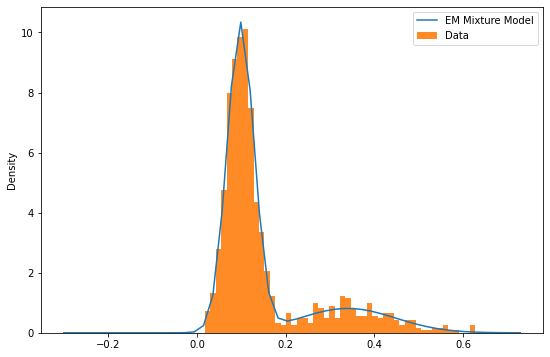

In [32]:
em.mix_gauss.plot_histogram_pdf()
_ = plt.hist(np.reshape(data, -1), bins=50, density=True, alpha=0.9, )
plt.legend(['EM Mixture Model', 'Data'])

In [65]:
class MultivariateGuassian():
    # Multivariate Guassian distribution
    def __init__(self, mu, sigma):
        self.mu = mu # mean vector
        self.sigma = sigma # covariance matrix
        self.n = len(mu)
    
    def pdf(self, x):
        # Calculate the probability density function of the multivariate guassian distribution
        x_mu = x - self.mu
        return 1.0 / (np.sqrt((2 * np.pi) ** self.n * np.linalg.det(self.sigma))) * np.exp(-0.5 * x_mu.T @ np.linalg.inv(self.sigma) @ x_mu)
    
    def sample(self, n=1):
        # Generate a list of n samples from the multivariate guassian distribution
        samples = []
        for i in range(n):
            samples.append(np.random.multivariate_normal(self.mu, self.sigma))
        return samples
    
    def plot_2d_pdf(self, n_spaces=50):
        # plot the 2D pdf of a two dimensional guassian distribution
        fig, axes = plt.subplots(1, sharex=True, figsize=(9, 6))
        # Plot the normalized histogram of the data set and plot the PDF along side.
        min_range = np.min(self.mu) - 4 * np.max(self.sigma)
        max_range = np.max(self.mu) + 4 * np.max(self.sigma)
        # Calculate the interval between x values
        interval = 1.0 * (max_range - min_range) / n_spaces
        x = []
        y = []
        # Calculate the x values to visualize
        for i in range(n_spaces):
            tmp = min_range + interval * i
            x.append(tmp)
            y.append(self.pdf(tmp))
        # Make the plots    
        axes.plot(x, y)
        axes.set_label(f"Multivariate Guassian")
        axes.set_ylabel('Density')
        return x, y
        
        

In [139]:
class MixtureMultivariateGuassian():
    """Mixture of K Multivariate Guassian Distribution"""
    def __init__(self, K=2, mu=None, sigma=None, pi=None):
        self.K = K
        self.mu = mu
        self.sigma = sigma
        self.pi = pi
        self.gaussians = [MultivariateGuassian(mu[i], sigma[i]) for i in range(K)]
    
    def pdf(self, x):
        # Calculate the value of the PDF for a given x value.
        return sum([self.pi[k] * self.gaussians[k].pdf(x) for k in range(self.K)])
    
    def cdf(self, x):
        # Calculate the value of the CDF for a given x value.
        return sum([self.pi[k] * self.gaussians[k].cdf(x) for k in range(self.K)])
    
    def log_likelihood(self, X):
        # Calculate the log likelihood of the data set
        return sum([np.log(self.pdf(x)) for x in X])
    
    def sample(self, n=1, p=None):
        # Generate a list of n samples from the mixture of guassian distribution. 
        # return the list of samples and their corresponding labels
        samples = []
        labels = []
        if p is None:
            p = self.pi
        for i in range(n):
            k = np.random.choice(self.K, p=p)
            samples.append(self.gaussians[k].sample())
            labels.append(k)
        return np.array(samples).reshape(-1, self.K), labels
    
    def plot_histogram(self):
        # Plot a histogram of the data set.
        for k in range(self.K):
            self.gaussians[k].plot_histogram()
    
    def plot_histogram_pdf(self, n_spaces=50):
        # Plot the normalized histogram of the data set and plot the PDF along side.
        fig, axes = plt.subplots(1, sharex=True, figsize=(9, 6))

        # Plot the normalized histogram of the data set and plot the PDF along side.
        min_range = np.min(self.mu) - 4 * np.max(self.sigma)
        max_range = np.max(self.mu) + 4 * np.max(self.sigma)
        # Calculate the interval between x values
        interval = 1.0 * (max_range - min_range) / n_spaces
        x = []
        y = []
        # Calculate the x values to visualize
        for i in range(n_spaces):
            tmp = min_range


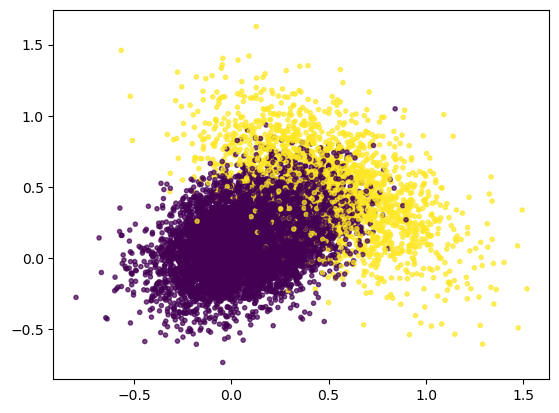

In [140]:
# mixture of two multivariate guassians with different means and covariances
mu = np.array([[0.1, .15], [.5, .5]])
sigma = np.array([[[.05, .02], [.02, .05]], [[.1, -.05], [-.05, .1]]])
pi = [0.5, 0.5]
# scatter plot of a randomly generarted data with their labels
data, labels = MixtureMultivariateGuassian(2, mu, sigma, pi).sample(10000, p=[0.8, 0.2])
plt.scatter(*np.array(data).T, c=labels, marker='.', alpha=0.7)


In [141]:
class MVGEM():
    """Expectation Maximization algoirthm for clustering a mixture of multivariate guassian distributions"""
    # make sure to prevent the algorithm from coming up with singular covariance matrices
    def __init__(self, K=2, mu=None, sigma=None, pi=None, max_iter=100, tol=1e-6):
        self.K = K
        self.mu = mu
        self.sigma = sigma
        self.pi = pi
        self.max_iter = max_iter
        self.tol = tol
        self.gaussians = [MultivariateGuassian(mu[i], sigma[i]) for i in range(K)]
        self.log_likelihoods = []
    
    def E_step(self, X):
        # Calculate the responsibilities of each cluster for each data point
        N = len(X)
        responsibilities = np.zeros((N, self.K))
        for i in range(N):
            for k in range(self.K):
                responsibilities[i, k] = self.pi[k] * self.gaussians[k].pdf(X[i])
            responsibilities[i] /= np.sum(responsibilities[i])
        return responsibilities
    
    def M_step(self, X, responsibilities):
        # Calculate the new parameters of the mixture of guassians
        N, D = X.shape
        Nk = np.sum(responsibilities, axis=0)
        self.mu = np.dot(responsibilities.T, X) / Nk.reshape(-1, 1)
        self.sigma = np.zeros((self.K, D, D))
        for k in range(self.K):
            for n in range(N):
                diff = (X[n] - self.mu[k]).reshape(-1, 1)
                self.sigma[k] += responsibilities[n, k] * np.dot(diff, diff.T)
            self.sigma[k] /= Nk[k]
        self.pi = Nk / N
    
    def fit(self, X):
        # Fit the mixture of guassians to the data set X
        if isinstance(X, list):
            X = np.array(X)
        N, D = X.shape
        # Initialize the parameters if they are not provided
        if self.mu is None:
            idx = np.random.choice(N, self.K, replace=False)
            self.mu = X[idx]
        if self.sigma is None:
            self.sigma = np.array([np.eye(D)] * self.K)
        if self.pi is None:
            self.pi = np.ones(self.K) / self.K
        # Run the EM algorithm
        for i in range(self.max_iter):
            # E step
            responsibilities = self.E_step(X)
            # M step
            self.M_step(X, responsibilities)
            # Calculate the log likelihood
    
    def cluster(self, X):
        # Cluster the data set X
        N = len(X)
        responsibilities = np.zeros((N, self.K))
        for i in range(N):
            for k in range(self.K):
                responsibilities[i, k] = self.pi[k] * self.gaussians[k].pdf(X[i])
            responsibilities[i] /= np.sum(responsibilities[i])
        return np.argmax(responsibilities, axis=1)
    
    def plot_scatter_clusters(self, X, labels):
        # Plot the data set X with their corresponding labels
        plt.scatter(*np.array(X).T, c=labels, marker='.', alpha=0.7)
        

In [142]:
mvgem = MVGEM(K=2, mu=mu, sigma=sigma, pi=[0.5, 0.5])
mvgem.fit(data,)

In [148]:
# cluster the data using the Kmeans algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1, random_state=0)
kmeans.fit(data)

KMeans(max_iter=100, n_clusters=2, n_init=1, random_state=0)

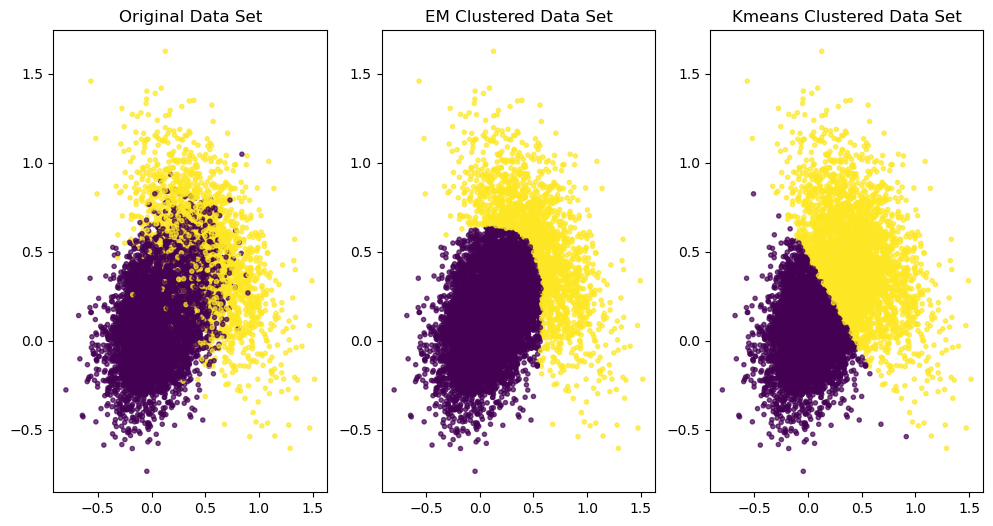

In [149]:
# plot tjhe original, EM cluster and Kmeans cluster on the same plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Data Set')
plt.scatter(*np.array(data).T, c=labels, marker='.', alpha=0.7)
plt.subplot(1, 3, 2)
plt.title('EM Clustered Data Set')
mvgem.plot_scatter_clusters(data, mvgem.cluster(data))
plt.subplot(1, 3, 3)
plt.title('Kmeans Clustered Data Set')
plt.scatter(*np.array(data).T, c=kmeans.labels_, marker='.', alpha=0.7)
